## ICE-7. MPEG-7 Color Layout Descriptor
Please download the images from the following link:<br>
https://drive.google.com/file/d/1h0JFzpyc7zNZiln5Ls74CfvOfhtl51XK/view?usp=sharing <br><br>
Please refer to the following link for the code of Color Layout Descriptor: <br>
https://github.com/scferrada/imgpedia

In [120]:
#import statments
import os
from PIL import Image as im
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [121]:
#Google Drive Connectivity 

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [122]:
pathColab="/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/"

In [123]:
#read image 
file_main_folder=pathColab
file_names_folder = [file_main_folder+f for f in os.listdir(file_main_folder)]
print(file_names_folder)

['/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/011.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/003.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/004.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/006.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/005.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/007.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/008.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/009.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/010.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/001.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/002.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/012.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 7/013.jpg', '/content/gdrive/MyDrive/AI Projects/Feature Engin

## Task 1. Please using the given code to extract the color layout features from the downloaded image 001.jpg, and display it.

In [124]:
# write you code here
#Ref: https://github.com/scferrada/imgpedia/blob/master/IMGdescriptors/Python/ColorLayoutComputer.py
?
def colorExtract(row,col,image):
  img=cv2.imread(image)
  avg = np.zeros((row , col ,3))
  imgH, imgW, _ = img.shape
  for i in range(row):
    for j in range(col):
      slice = img[imgH//row * i : imgH//row * (i+1),imgW//col *j : imgW//col*(j+1)]
      avg_coloe_per_row = np.mean(slice,axis=0)
      avg_color = np.mean(avg_coloe_per_row,axis =0)
      avg_color = np.uint8(avg_color)
      avg[i][j][0] = avg_color[0]
      avg[i][j][1] = avg_color[1]
      avg[i][j][2] = avg_color[2]
    icon = cv2.cvtColor(np.array(avg,dtype=np.uint8),cv2.COLOR_BGR2YCR_CB)
  y, cr, cb = cv2.split(icon)
  dct_y = cv2.dct(np.float32(y))
  dct_cb = cv2.dct(np.float32(cb))
  dct_cr = cv2.dct(np.float32(cr))
  dct_y_zigzag = []
  dct_cb_zigzag = []
  dct_cr_zigzag = []
  flip = True
  flipped_dct_y = np.fliplr(dct_y)
  flipped_dct_cb = np.fliplr(dct_cb)
  flipped_dct_cr = np.fliplr(dct_cr)
  for i in range(row + col -1):
    k_diag = row - 1 - i
    diag_y = np.diag(flipped_dct_y ,k = k_diag)
    diag_cb = np.diag(flipped_dct_cb ,k = k_diag)
    diag_cr = np.diag(flipped_dct_cr ,k = k_diag)
    if flip:
      diag_y = diag_y[::-1]
      diag_cb = diag_cb[::-1]
      diag_cr = diag_cr[::-1]
    dct_y_zigzag.append(diag_y)
    dct_cb_zigzag.append(diag_cb)
    dct_cr_zigzag.append(diag_cr)
    flip = not flip
  return np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])



In [145]:
value=colorExtract(int(8),int(8),file_names_folder[9])

print(value)

[ 7.54875000e+02 -3.71453323e+01 -2.75391340e-01 -2.05506805e+02
  7.78458118e-02 -2.34176540e+01 -3.93178177e+01  3.43435440e+01
  2.75409832e+01 -5.34270144e+00 -4.38749962e+01  5.65796137e+00
  2.59727144e+00 -2.54443989e+01 -1.43749990e+01 -2.34878922e+01
  2.55022888e+01  2.20043144e+01 -3.80048027e+01 -5.47946119e+00
  6.65457249e-02  5.35990143e+01 -1.31532030e+01  2.22181991e-01
  4.08514328e+01 -2.71923733e+00 -2.33335514e+01 -7.21246719e+00
 -2.86610579e+00  1.22206154e+01  3.80418730e+00 -3.12251778e+01
  3.03049412e+01  1.38941956e+00  7.60543060e+00  1.85286942e+01
  1.82548885e+01 -2.60227919e-03 -1.26275702e+01  2.58750000e+01
  2.63148155e+01 -3.00260162e+00 -2.30272031e+00 -2.49541342e-01
 -1.75480080e+01  2.62883587e+01  8.04879284e+00 -2.93222828e+01
  1.81053467e+01 -1.63744411e+01 -1.93038063e+01  1.69019318e+00
  8.70240593e+00  1.83429086e+00  4.75084925e+00  5.05935907e+00
 -1.27258701e+01 -8.98754883e+00 -8.12548637e+00  6.52728617e-01
  2.36596012e+00 -1.14373

## Task 2. Retrieve the image that is the most similar to image 001.jpg from the downloaded images (not itself).
Please try to use at least three different metrics to measure the distance between color layout descriptors (L1 distance, L2 distance, earth mover's distance, etc)

In [141]:
# write you code here
def retrive_img(image):
  img_set=[]
  for i in image:
    img_set.append(cv2.imread(i))
  array = [0] *len(img_set)
  l1_list = [0] *len(img_set)
  l2_list = [0] *len(img_set)
  end = [0] *len (img_set)
  for i in range(0,len(file_names_folder)):
    #print(i)
    array[i]+=colorExtract(8,8,file_names_folder[i])
    l1_list[i] += np.linalg.norm(array[0]-array[i],ord=1)
    l2_list[i] += np.linalg.norm(array[0]-array[i],ord=2)
    end[i] += sum(abs(array[0] - array[i]))/(len(img_set)-1)
  
  print("L1 Distance : ",l1_list)
  print("L2 Distance : ",l2_list)
  print("Earth Move Distance : ",end)

  img=cv2.imread(file_names_folder[9])
  plt.figure()
  plt.axis("off")
  plt.imshow(img[:,:,::-1])
  return 

L1 Distance :  [0.0, 3873.524658203125, 3869.8681640625, 2759.383544921875, 4317.138671875, 4688.619140625, 4066.563720703125, 4589.43212890625, 3263.889892578125, 3608.269775390625, 3596.73388671875, 3933.05224609375, 3094.236083984375, 3328.5048828125, 3893.01513671875, 4370.5595703125, 3887.261474609375]
L1 Min val :  0.0
17
L2 Distance :  [0.0, 674.6287841796875, 560.4354858398438, 385.03375244140625, 637.4244995117188, 820.5466918945312, 613.5731201171875, 567.5790405273438, 521.9013671875, 507.5677185058594, 602.0946655273438, 854.63037109375, 536.3552856445312, 534.0243530273438, 595.7708740234375, 582.7949829101562, 584.9786376953125]
Earth Move Distance :  [0.0, 242.09529517032206, 241.86675578542054, 172.46148062124848, 269.821157598868, 293.03872156888247, 254.1602318091318, 286.8395004514605, 203.99311546236277, 225.5168594243005, 224.79587343148887, 245.81576185207814, 193.3897529952228, 208.0315537955612, 243.31345614232123, 273.1599755734205, 242.9538395497948]


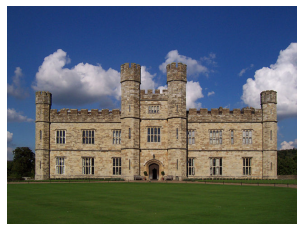

In [142]:
retrive_img(file_names_folder)

Text(0.5, 1.0, 'Matching image')

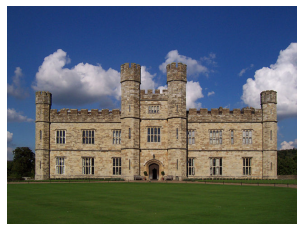

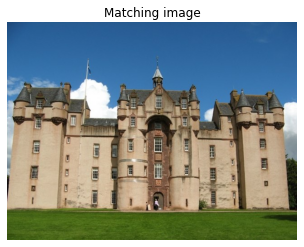

In [134]:
img=cv2.imread(file_names_folder[9])
plt.figure()
plt.axis("off")
plt.imshow(img[:,:,::-1])
img=cv2.imread(file_names_folder[10])
plt.figure()
plt.axis("off")
plt.imshow(img[:,:,::-1])
plt.title("Matching image")

## Question 1. Please answer if the outputs of Task 2 are the same. If the outputs are different, based on your perspective, which metrics gives the most similar retrieval? If the outputs are the same, do you think we can use any metrics to compare the color layout features in any cases? Give an explanation to your answer.

**Answer to Q1**: type your answer here


All the 3 metrics are used such as Manhattan ,Ecludian and Earth movers distance to compare the Images. 

We can use any of the 3 above specified methods ,The given set can vary based on external factors such as the contrast, image resolution 

The Compared image 9 is simlar to image 10.

---